In [1]:
# conda install python-louvain spacy networkx nxviz

# Introduction

In this work, we are going to analyze and generate the networks among characters based on five GOT's books (***yeah baby! The HBO series***). To do that: 

- First of all, we chose five favourites characters as our *source* and then set filters to understand the relantionship with others characters, our *target*:
    - My favourites characters chosen were: Arya-Stark, Bran-Stark, Cersei-Lannister, Jon-Snow, Tyrion-Lannister.
    - I need to clarify that Hodor was chosen previously, but as he had relevance just among few others characters I change it for Jon-Snow just for visualization purposes.
- Secondly, we calculate the average of the given weight in each book to determine the most relevant character among our favourites, getting from 5 to 1 to the most and least important, respectively.
    - We can find a plot with the evolution throughout the books.
    - Also, we added a way to clean the rank when one of the favourite character has no interaction in a book.
- Networkx
- Pyvis
- Community Detection

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import networkx as nx
from pyvis.network import Network
import community as community_louvain

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
'''Set the background style for the plots'''
sns.set_style("whitegrid")  # Options include: "darkgrid", "whitegrid", "dark", "white", and "ticks"
'''Set the background color for the figures'''
plt.rcParams['figure.facecolor'] = 'lightblue'

In [3]:

book1 = pd.read_csv('book1.csv')
print('Book 1\n')
display(book1.info())
display(book1.head(1))

book2 = pd.read_csv('book2.csv')
print('---')
print('Book 2\n')
display(book2.info())
display(book2.head(1))

book3 = pd.read_csv('book3.csv')
print('---')
print('Book 3\n')
display(book3.info())
display(book3.head(1))

book4 = pd.read_csv('book4.csv')
print('---')
print('Book 4\n')
display(book4.info())
display(book4.head(1))

book5 = pd.read_csv('book5.csv')
print('---')
print('Book 5\n')
display(book5.info())
display(book5.head(1))


Book 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    object
 1   Target  684 non-null    object
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


None

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1


---
Book 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  775 non-null    object 
 1   Target  775 non-null    object 
 2   Type    775 non-null    object 
 3   weight  775 non-null    int64  
 4   book    774 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 30.4+ KB


None

,Source,Target,Type,weight,book
0,Aegon-I-Targaryen,Harren-Hoare,Undirected,4,2.0


---
Book 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  1008 non-null   object
 1   Target  1008 non-null   object
 2   Type    1008 non-null   object
 3   weight  1008 non-null   int64 
 4   book    1008 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 39.5+ KB


None

,Source,Target,Type,weight,book
0,Addam-Marbrand,Gyles-Rosby,Undirected,3,3


---
Book 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  682 non-null    object
 1   Target  682 non-null    object
 2   Type    682 non-null    object
 3   weight  682 non-null    int64 
 4   book    682 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


None

,Source,Target,Type,weight,book
0,Addam-Marbrand,Brynden-Tully,undirected,3,4


---
Book 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  760 non-null    object
 1   Target  760 non-null    object
 2   Type    760 non-null    object
 3   weight  760 non-null    int64 
 4   book    760 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 29.8+ KB


None

,Source,Target,Type,weight,book
0,Aegon-I-Targaryen,Daenerys-Targaryen,undirected,4,5


Since the books share the same format, let's merge them all into one DataFrame

In [4]:
books = pd.concat([book1, book2, book3, book4, book5]).reset_index(drop=True)
books.head(3)

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1.0
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1.0
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1.0


In [5]:
books.tail(3)

,Source,Target,Type,weight,book
3906,Victarion-Greyjoy,Wulfe,undirected,3,5.0
3907,Walder-Frey-(son-of-Jammos),Walder-Frey-(son-of-Merrett),undirected,10,5.0
3908,Yandry,Ysilla,undirected,14,5.0


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3909 non-null   object 
 1   Target  3909 non-null   object 
 2   Type    3909 non-null   object 
 3   weight  3909 non-null   int64  
 4   book    3908 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 152.8+ KB


## Picking up 5 GoT characters


In [7]:
favourites_c = books[books['Source'].str.lower().str.contains('arya|tyrion|snow|cersei|bran|hodor', na=False)]['Source'].unique()
favourites_c

array(['Addam-Marbrand', 'Arya-Stark', 'Bran-Stark', 'Brandon-Stark',
       'Cersei-Lannister', 'Hodor', 'Jon-Snow', 'Tyrion-Lannister',
       'High-Septon-(Tyrions)', 'Ramsay-Snow', 'Brandon-Norrey',
       'Marya-Seaworth'], dtype=object)

Perfect! My favourite characters are *Arya-Stark, Bran-Stark, Cersei-Lannister, Hodor, and Tyrion-Lannister*

In [8]:
favourite_characters = ['Arya-Stark', 'Bran-Stark', 'Cersei-Lannister', 'Jon-Snow', 'Tyrion-Lannister']

In [9]:
books[books['Source'] == 'Arya-Stark']

,Source,Target,Type,weight,book
41,Arya-Stark,Benjen-Stark,Undirected,3,1.0
42,Arya-Stark,Bran-Stark,Undirected,14,1.0
43,Arya-Stark,Catelyn-Stark,Undirected,5,1.0
44,Arya-Stark,Cersei-Lannister,Undirected,12,1.0
45,Arya-Stark,Desmond,Undirected,3,1.0
...,...,...,...,...,...
3221,Arya-Stark,Melisandre,undirected,4,5.0
3222,Arya-Stark,Ramsay-Snow,undirected,5,5.0
3223,Arya-Stark,Sansa-Stark,undirected,4,5.0
3224,Arya-Stark,Theon-Greyjoy,undirected,7,5.0


## Rank the relevance of these 5 characters across the 5 books. 

The most relevant of the five characters in book1 should get a score of 5 and the less relevant a score of 1, and so on for the rest of the books.

My approach is to consider every Character when they appear as the Source, but also when they appear as the target! This approach will allow us to set relationship among chracters throughtout the books

Using the Simple Average for each favourite characters

In [10]:
'''Initialize an empty list to store dictionaries of character ranking information'''
list = []

'''Iterate over each book'''
for book_num in range(1, 6):
    '''Filter the DataFrame for the current book'''
    current_book = books[books['book'] == book_num]
    
    '''Create an empty dictionary to store average weights for each character'''
    avg_weights = {}
    
    '''Iterate over each character'''
    for character in favourite_characters:
        '''Filter rows where the character is the source or the target'''
        character_rows = current_book[(current_book['Source'] == character) | (current_book['Target'] == character)]
        
        '''Calculate the average weight for the character in the current book'''
        avg_weight = character_rows['weight'].mean()
        
        '''Store the average weight in the dictionary'''
        avg_weights[character] = avg_weight
    
    '''Sort characters based on their average weights'''
    sorted_characters = sorted(avg_weights, key=avg_weights.get, reverse=False)
    
    '''Assign rankings based on sorted characters'''
    for rank, character in enumerate(sorted_characters, start=1):
        list.append({'Character': character,
                             'Book': book_num,
                             'Avg_Weight': avg_weights[character],
                             'Ranking': rank})

In [11]:

df1 = pd.DataFrame(list)
df1

,Character,Book,Avg_Weight,Ranking
0,Tyrion-Lannister,1,14.130435,1
1,Cersei-Lannister,1,14.133333,2
2,Arya-Stark,1,15.925926,3
3,Bran-Stark,1,16.593750,4
4,Jon-Snow,1,21.189189,5
5,Arya-Stark,2,10.600000,1
6,Cersei-Lannister,2,11.976744,2
7,Jon-Snow,2,12.857143,3
8,Tyrion-Lannister,2,15.641509,4
9,Bran-Stark,2,16.200000,5


As I mentioned before, I had used Hodor over Jon-Snow and he hadn't any interaction on the book 4, so if we change for someone else character I would like to keep the code to clean NaN values ranked as 5 when this happen.

let's put NaN in the rank when the average weight is NaN (or null) and then re-ranked again the relevance.

In [12]:
'''Calculate rankings based on average weights'''
df1['Ranking'] = df1.groupby('Book')['Avg_Weight'].rank(ascending=True, na_option='bottom')

'''Find maximum rank in each book'''
max_rank_per_book = df1.groupby('Book')['Ranking'].max()

'''Iterate over each book'''
for book_num, max_rank in max_rank_per_book.items():
    '''Find characters with NaN average weight in the current book'''
    nan_count = df1[(df1['Book'] == book_num) & df1['Avg_Weight'].isna()].shape[0]
    '''Subtract the count of NaN values from the maximum rank in the book'''
    max_rank_adjusted = max_rank - nan_count
    '''Update rankings for characters with non-NaN average weights'''
    non_nan_indices = df1[(df1['Book'] == book_num) & df1['Avg_Weight'].notna()].index
    df1.loc[non_nan_indices, 'Ranking'] += (5 - max_rank_adjusted)
    '''Set rank to NaN for characters with NaN average weights'''
    nan_indices = df1[(df1['Book'] == book_num) & df1['Avg_Weight'].isna()].index
    df1.loc[nan_indices, 'Ranking'] = np.nan

df1


,Character,Book,Avg_Weight,Ranking
0,Tyrion-Lannister,1,14.130435,1.0
1,Cersei-Lannister,1,14.133333,2.0
2,Arya-Stark,1,15.925926,3.0
3,Bran-Stark,1,16.593750,4.0
4,Jon-Snow,1,21.189189,5.0
5,Arya-Stark,2,10.600000,1.0
6,Cersei-Lannister,2,11.976744,2.0
7,Jon-Snow,2,12.857143,3.0
8,Tyrion-Lannister,2,15.641509,4.0
9,Bran-Stark,2,16.200000,5.0


## Relevance evolution of the different characters
Let's plot the evolution of the relevance during the books

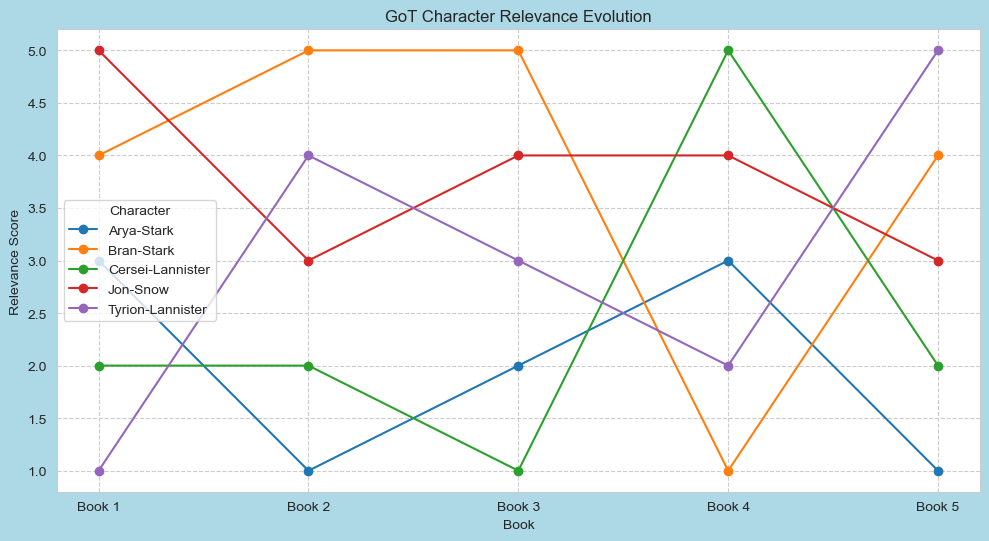

In [13]:

'''Plot the relevance evolution'''
plt.figure(figsize=(10, 6))

'''Iterate over each character'''
for character in favourite_characters:
    '''Filter the DataFrame for the current character'''
    character_df = df1[df1['Character'] == character]
    
    '''Plot the relevance evolution for the character'''
    plt.plot(character_df['Book'], character_df['Ranking'], marker='o', label=character)

plt.title('GoT Character Relevance Evolution')
plt.xlabel('Book')
plt.ylabel('Relevance Score')
plt.xticks(range(1, 6), [f'Book {i}' for i in range(1, 6)])
plt.grid(True, axis='both', linestyle='--')
plt.legend(title='Character')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust padding around the plot area
plt.show()


We can see a mix of results! Noone of the characters kept the most relevance during the five books. Bran-Stark got the most relevancy during two books, being the less relevant in the book 4.

Also, Characters as Arya and Tyrion never were ranked as the most relevance.

## Let's graph some Networkx

In [14]:
'''Create a graph from the pandas DataFrame'''
G = nx.from_pandas_edgelist

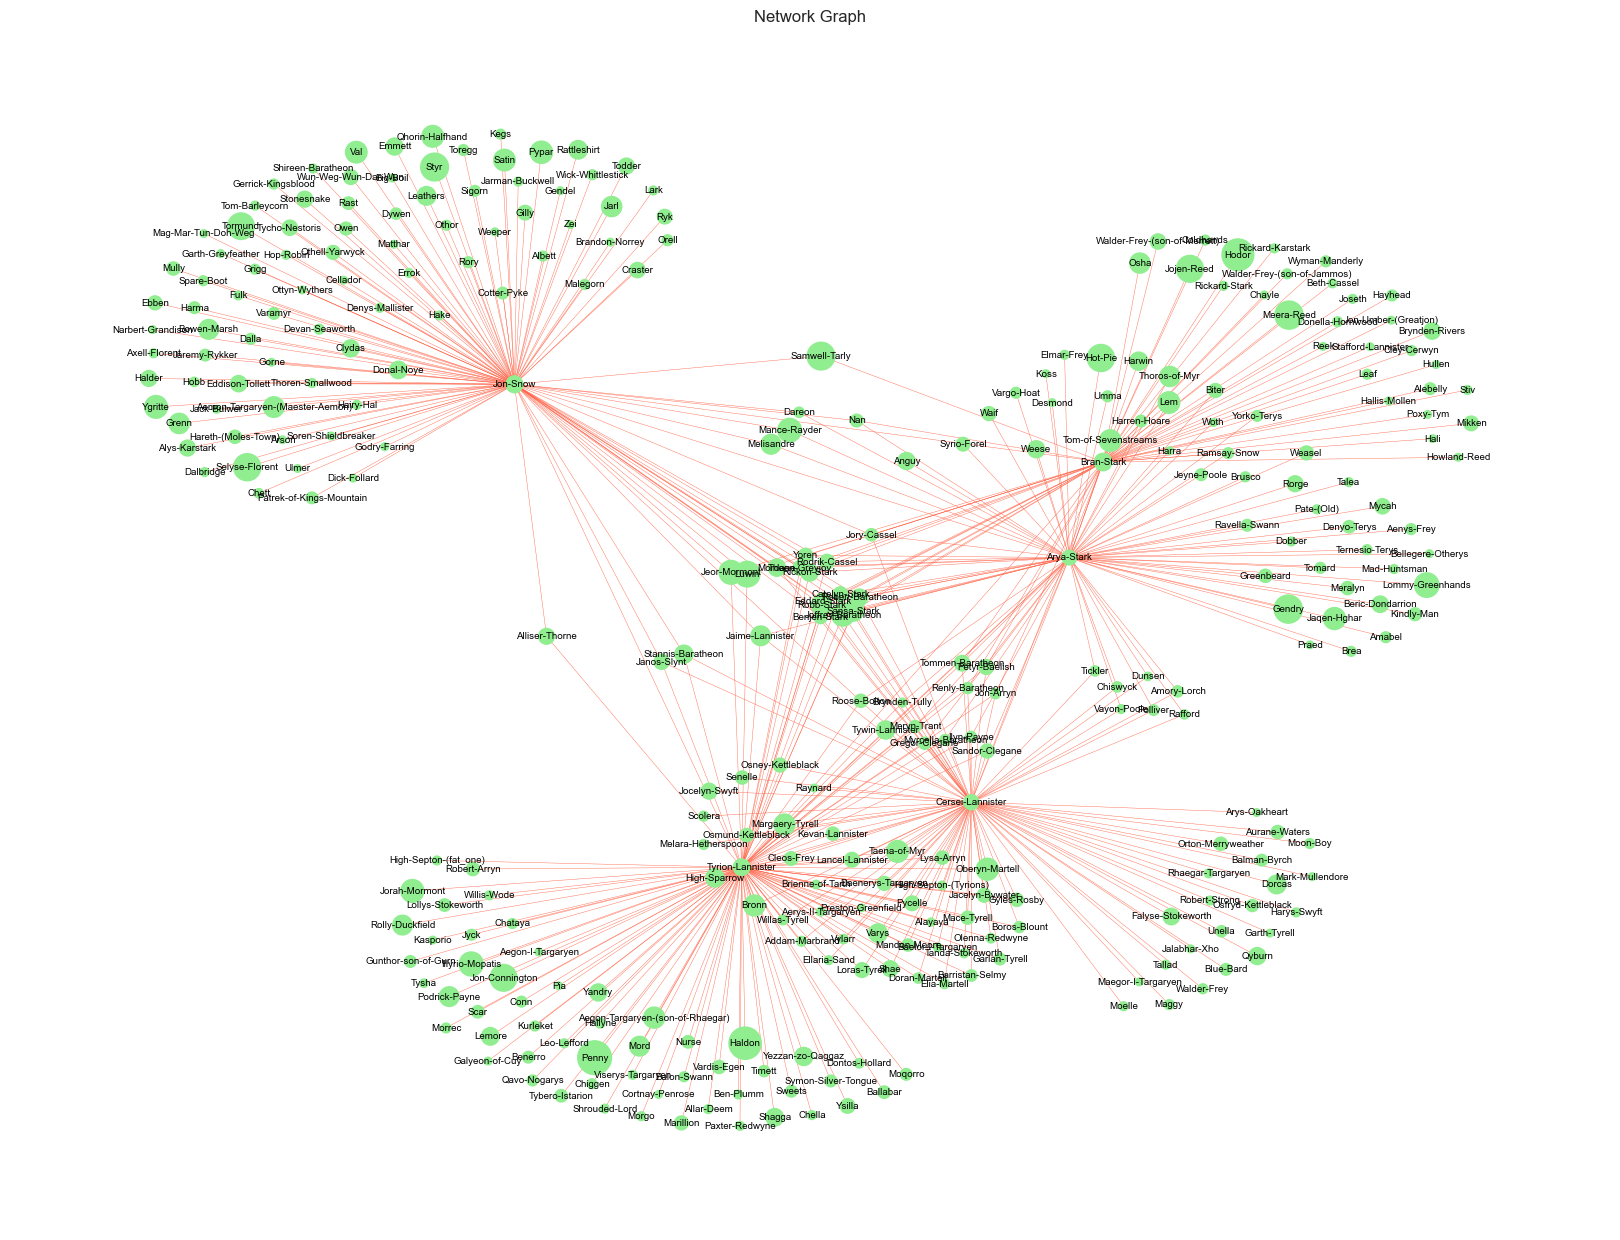

In [15]:
'''Initialize an empty list to store filtered DataFrames'''
filtered_dfs = []

'''Iterate over each character'''
for character in favourite_characters:
    '''Filter rows where the character is the source or the target'''
    filtered_df = books[(books['Source'] == character) | (books['Target'] == character)]
    filtered_dfs.append(filtered_df)

'''Concatenate the filtered DataFrames into one DataFrame'''
books_fav = pd.concat(filtered_dfs)

'''Initialize a directed graph'''
plt.figure(figsize=(16, 12))
G = nx.from_pandas_edgelist(books_fav, 
                            source='Source', 
                            target='Target')

'''Calculate node sizes based on the weight attribute'''
node_sizes = []
for node, data in G.nodes(data=True):
    weight = books_fav[(books_fav['Source'] == node) | (books_fav['Target'] == node)]['weight'].mean()
    node_sizes.append(weight * 10)

'''Draw the graph with node sizes'''
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=node_sizes, font_size=7, 
        edge_color="tomato", 
        width=0.3)
plt.title('Network Graph')
plt.show()


This kind of graph seems to not being the best option for visualizing the interactions among my favourites characters throughout the books. So, let's try another approach

### Pyvis

It provides an easy-to-use interface for creating and customizing network visualizations that can be displayed in web browsers. Pyvis leverages the popular JavaScript library vis.js to generate interactive network graphs with features such as node and edge highlighting, zooming, panning, and dynamic updates. With Pyvis, users can create interactive network visualizations directly within Python environments, making it a convenient tool for exploring and presenting complex network data.

In [16]:

net = Network(notebook=True, width='1000px', height='700px', bgcolor='#322222', font_color='white')

'''Calculating the node size, using the node degrees'''
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('witcher.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


'''This is for GitHub purposes'''
![Witcher Image](witcher.png)

In [18]:
favourite_nodes = {node: degree for node, degree in node_degree.items() if node in favourite_characters}
favourite_nodes

{'Arya-Stark': 84,
 'Bran-Stark': 54,
 'Cersei-Lannister': 97,
 'Jon-Snow': 114,
 'Tyrion-Lannister': 122}

 Tyrion-Lannister had the greatest node degrees during the five books, validating his influence during the whole GOT serie. Also, Cersei-Lannister had a big connection among characters, having 97 node degrees. The following influence Arya-Stark, Bran-Stark and last but not less, Hodor.

As we could see in the pyvis visualization, we observe the influence of my favourites characters across the five books. Tyrion-Lannister emerges as a central figure, boasting the highest node degree of 122, indicative of his significant connections throughout the series. Jon-Snow and Cersei Lannister also demostrates considerable influence, with a node degree of 114 and 97, respectively, reflecting their extensive interactions with other characters.

Arya Stark and Bran Stark follow closely behind, with node degrees of 84 and 54 respectively, highlighting their pivotal roles and widespread connections within the network.

This version emphasizes the significance of each character's influence, provides context for their node degrees, and underscores the complexity of the network dynamics in Game of Thrones.

## Community Detection

It refers to the process of identifying groups or communities within a network where nodes share some common characteristics or exhibit strong connections with each other. 

In [19]:
communities = community_louvain.best_partition(G)

In [20]:
communities

{'Arya-Stark': 0,
 'Benjen-Stark': 2,
 'Bran-Stark': 2,
 'Catelyn-Stark': 2,
 'Cersei-Lannister': 4,
 'Desmond': 0,
 'Eddard-Stark': 2,
 'Ilyn-Payne': 0,
 'Jeyne-Poole': 0,
 'Joffrey-Baratheon': 2,
 'Jon-Snow': 1,
 'Jory-Cassel': 2,
 'Meryn-Trant': 0,
 'Mordane': 0,
 'Mycah': 0,
 'Myrcella-Baratheon': 0,
 'Petyr-Baelish': 2,
 'Rickon-Stark': 2,
 'Robb-Stark': 2,
 'Robert-Baratheon': 2,
 'Rodrik-Cassel': 2,
 'Sandor-Clegane': 0,
 'Sansa-Stark': 2,
 'Syrio-Forel': 0,
 'Tomard': 0,
 'Tommen-Baratheon': 2,
 'Vayon-Poole': 0,
 'Yoren': 2,
 'Aenys-Frey': 0,
 'Amabel': 0,
 'Amory-Lorch': 0,
 'Beric-Dondarrion': 0,
 'Biter': 0,
 'Chiswyck': 0,
 'Dobber': 0,
 'Dunsen': 0,
 'Gendry': 0,
 'Gregor-Clegane': 0,
 'Harra': 0,
 'Harren-Hoare': 0,
 'Hot-Pie': 0,
 'Jaime-Lannister': 0,
 'Jaqen-Hghar': 0,
 'Koss': 0,
 'Lommy-Greenhands': 0,
 'Nan': 2,
 'Polliver': 0,
 'Praed': 0,
 'Rafford': 0,
 'Roose-Bolton': 0,
 'Rorge': 0,
 'Tyrion-Lannister': 3,
 'Tywin-Lannister': 0,
 'Vargo-Hoat': 0,
 'Weasel': 0,

In [21]:
nx.set_node_attributes(G, communities, 'group')

In [22]:
com_net = Network(notebook=True, width='1000px', height='700px', bgcolor='222222', font_color='white')
com_net.from_nx(G)
com_net.show('witcher_communities.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


'''This is for GitHub purposes'''
![Witcher Community Image](witcher_cummunities.png)

Here, we can visualized the interactions by group of each favourite character.